In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

In [2]:
LDS3folder = 'E:\Data Science\Mathematics and Statistics for Data Science\Jupyter Lab\Test\Data/'
data = pd.read_csv(LDS3folder + 'Breast Cancer.csv', index_col=0)
print(data)

           BMI  Glucose  Insulin      HOMA   Leptin  Adiponectin  Resistin  \
Age                                                                          
48   23.500000       70    2.707  0.467409   8.8071     9.702400   7.99585   
83   20.690495       92    3.115  0.706897   8.8438     5.429285   4.06405   
82   23.124670       91    4.498  1.009651  17.9393    22.432040   9.27715   
68   21.367521       77    3.226  0.612725   9.8827     7.169560  12.76600   
86   21.111111       92    3.549  0.805386   6.6994     4.819240  10.57635   
..         ...      ...      ...       ...      ...          ...       ...   
45   26.850000       92    3.330  0.755688  54.6800    12.100000  10.96000   
62   26.840000      100    4.530  1.117400  12.4500    21.420000   7.32000   
65   32.050000       97    5.730  1.370998  61.4800    22.540000  10.33000   
72   25.590000       82    2.820  0.570392  24.9600    33.750000   3.27000   
86   27.180000      138   19.910  6.777364  90.2800    14.110000

Áp dụng phương pháp PCA để giảm xuống còn k chiều so với dữ liệu gốc (k > 2).Giải thích nguyên nhân (hay cơ sở) của số chiều được giảm.


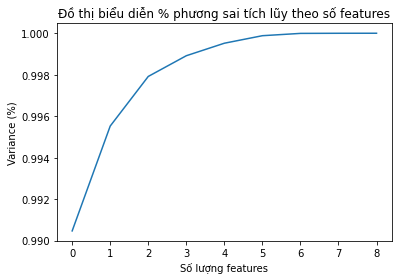

Phân tích chi tiết theo k:
   * k =  3 --> phương sai tích lũy 100%
   * k =  4 --> phương sai tích lũy 100%
   * k =  5 --> phương sai tích lũy 100%
   * k =  6 --> phương sai tích lũy 100%
   * k =  7 --> phương sai tích lũy 100%
   * k =  8 --> phương sai tích lũy 100%
   * k =  9 --> phương sai tích lũy 100%


In [3]:
print('Áp dụng phương pháp PCA để giảm xuống còn k chiều so với dữ liệu gốc (k > 2).Giải thích nguyên nhân (hay cơ sở) của số chiều được giảm.')
pca = PCA().fit(data)

# Vẽ đồ thị biểu diễn % phương sai tích lũy theo số features
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Số lượng features')
plt.ylabel('Variance (%)')
plt.title('Đồ thị biểu diễn % phương sai tích lũy theo số features')
plt.show()

print('Phân tích chi tiết theo k:')
for k in range(3, 10):
    pca = PCA(k)
    pca.fit(data)

    var = pca.explained_variance_ratio_.sum() * 100
    print('   * k = %2d' % k, '--> phương sai tích lũy %.0f%%' % var)

# Nhận xét:
#   - #f =  3: giữ lại ~ 100%  phương sai so với dữ liệu gốc
#   - #f >  3: giữ lại > 100%  phương sai so với dữ liệu gốc
#   - #f = 10: giữ lại   100% phương sai so với dữ liệu gốc
#


*** 1.2) Giảm chiều còn k = 2 và trực quan hóa dữ liệu ***
- Ma trận B_T (116, 2)
   Component 1  Component 2
0  -118.140842   -32.528260
1   -66.142565   -16.796036
2    19.752313   -13.381099
3   393.019821   -34.790461
4   239.000182   -22.206269 



<Figure size 576x432 with 0 Axes>

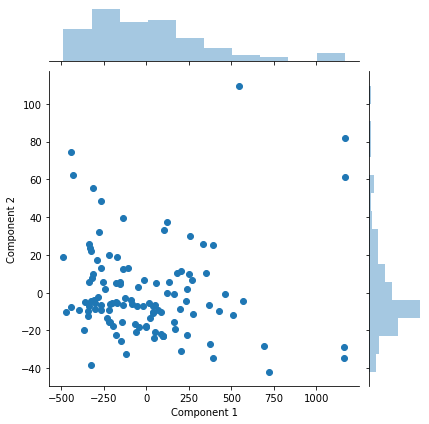

In [4]:
print('========================================================')
print('*** 1.2) Giảm chiều còn k = 2 và trực quan hóa dữ liệu ***')
print('========================================================')
k = 2
pca = PCA(k)
pca.fit(data)

# transform data
B = pca.transform(data)
print('- Ma trận B_T', B.shape)

principalDf = pd.DataFrame(data=B, columns=['Component 1', 'Component 2'])
print(principalDf.head(), '\n')

plt.figure(figsize=(8, 6))
sns.jointplot(x='Component 1', y='Component 2', data=principalDf)
plt.show()